In [21]:
import tensorflow
import keras 
from keras.models import Sequential
from keras.layers import Input,Flatten,Conv2D,MaxPooling2D,Dense
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt 

In [22]:
train=image_dataset_from_directory(r"D:\edu\INNO\Deep_Learning\Assignments\data\fower_classification_dataset\train",
                                  labels="inferred",label_mode="int",batch_size=32,image_size=(300,300),color_mode="rgb")
#we can include class_names=[listof classes names in which oredr we want],otherwise classes will be sorted in alphabetical order


Found 13642 files belonging to 14 classes.


In [23]:
valid=image_dataset_from_directory(r"D:\edu\INNO\Deep_Learning\Assignments\data\fower_classification_dataset\val",
                                  labels="inferred",label_mode="int",batch_size=32,image_size=(300,300),color_mode="rgb")  

Found 98 files belonging to 14 classes.


#### All the values in each pixel is from 0 to 255. We divide it by 255 to make it in the range of 0 to 1.

In [24]:
trainf=train.map(lambda image,label:(image/255,label)) 

In [25]:
validf=valid.map(lambda image,label:(image/255,label)) 

#### building the logical structure 
- first we will make the cnn architecture that will conists of pooling layer,convolutional layer,number of strides,padding

In [26]:
model=Sequential()

#adding input layer
model.add(Input(shape=(300,300,3)))#image is in rgb format 

#adding first convolutional layer 
model.add(Conv2D(10,(5,5),strides=(1,1),padding="valid",activation="relu"))
#adding first pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

#adding second convolutional layer 
model.add(Conv2D(30,(5,5),strides=(1,1),padding="valid",activation="relu"))
#adding second pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

#flattening
model.add(Flatten())

#adding dense layers
model.add(Dense(40,activation="relu"))
model.add(Dense(14,activation="softmax"))


In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 296, 296, 10)      760       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 295, 295, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 291, 291, 30)      7530      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 290, 290, 30)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2523000)           0         
                                                                 
 dense_2 (Dense)             (None, 40)               

In [27]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [28]:
history=model.fit(trainf,epochs=5,validation_data=validf)
history 

Epoch 1/5
427/427 [==============================] - 3184s 7s/step - loss: 3.4557 - accuracy: 0.1776 - val_loss: 2.2412 - val_accuracy: 0.1531
Epoch 2/5
427/427 [==============================] - 2959s 7s/step - loss: 1.8552 - accuracy: 0.3831 - val_loss: 2.0387 - val_accuracy: 0.3776
Epoch 3/5
427/427 [==============================] - 2916s 7s/step - loss: 1.1479 - accuracy: 0.6264 - val_loss: 2.0448 - val_accuracy: 0.4388
Epoch 4/5
427/427 [==============================] - 2645s 6s/step - loss: 0.6023 - accuracy: 0.8093 - val_loss: 2.7832 - val_accuracy: 0.4898
Epoch 5/5
427/427 [==============================] - 3070s 7s/step - loss: 0.3060 - accuracy: 0.9047 - val_loss: 3.9437 - val_accuracy: 0.3980


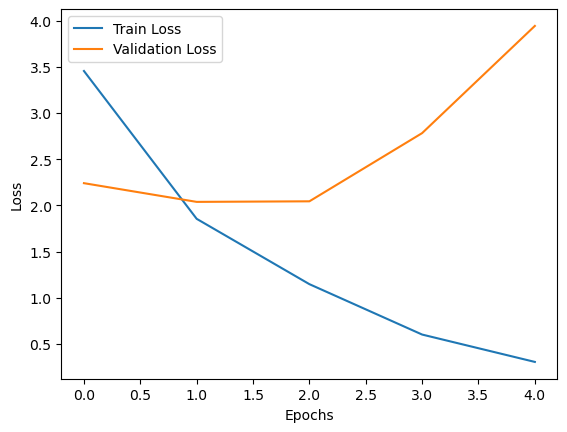

In [29]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
predicted=model.predict(validf)
predicted 

4/4 [==============================] - 5s 932ms/step


array([[8.29205674e-04, 1.37768131e-06, 1.04107805e-20, ...,
        1.10744203e-09, 8.81977677e-01, 2.00861606e-07],
       [1.12689717e-03, 2.62441844e-01, 1.13267617e-15, ...,
        4.23932076e-16, 6.29282921e-13, 2.82311719e-02],
       [7.10316783e-07, 1.24506641e-03, 2.32476177e-05, ...,
        6.30960076e-11, 1.23802602e-09, 4.77345056e-05],
       ...,
       [1.36684546e-14, 1.36568774e-15, 4.54781681e-01, ...,
        5.36423147e-01, 7.61539610e-22, 1.79222674e-12],
       [1.45330958e-07, 3.31803740e-09, 9.33146917e-25, ...,
        6.05231230e-12, 3.44795763e-12, 9.99019146e-01],
       [9.52760458e-01, 4.23220539e-04, 5.00902515e-16, ...,
        1.58065359e-06, 1.74619108e-05, 9.70010738e-10]], dtype=float32)

In [33]:
import numpy as np 

In [34]:
predicted=np.argmax(predicted,axis=1)

In [35]:
predicted

array([12,  6,  8,  4,  1,  3, 13,  6, 12,  2,  4,  2,  1, 12,  2,  8,  2,
       10,  3,  9,  1,  1,  3,  5,  2,  3, 12,  8,  3, 10,  9,  0,  8,  8,
        9,  9,  5,  9, 13,  2, 13,  9,  8,  7,  4,  3,  7,  9,  8,  8,  1,
        0,  4, 11,  8, 10,  1,  3,  3,  9, 10,  3,  5,  3, 13, 13,  5,  2,
       11,  2,  3,  6,  3, 12,  2,  5,  6,  1,  9,  2, 10,  8,  5,  8,  3,
        2,  1,  1,  8,  0,  1, 10, 12,  9, 13, 11, 13,  0], dtype=int64)